## Short exercises using the transformer package from Huggingface

Documentation + Tutorials are available here: https://huggingface.co/

On the HuggingFace platform various pre-trained language models (e.g. BERT) can be downloaded and used easily. Besides, they gathered various Datasets (and lots of other stuff) which you can use for your use cases.

Examples:
- BERT: original Bert model
- BERTweet: Pre-trained on tweets -> we will use it
- CamemBERT: pre-trained on the French language
- DistilBERT: Distilled BERT version (smaller and faster, with almost similar performance)
- etc.


Check it out, it is great! :-)

P.S. This notebook is inspired by the courses on the huggingface page -> https://huggingface.co/course/chapter1/1?fw=pt

In [ ]:
- Python 3.8
- pip install pandas pyarrow
- pip install scikit-learn==0.23
- pip install sklearn-crfsuite
- pip install gensim==3.8
- pip install numpy pandas matplotlib space
- pip install pytorch torch vision
- pip install transformers
- pip install emoji nltk seqeval

space, pytorch, vision

In [4]:
!pip install space

Error processing line 1 of /workspace/.local/lib/python3.6/site-packages/vision-1.0.0-nspkg.pth:

  Traceback (most recent call last):
    File "/usr/lib/python3.6/site.py", line 174, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Defaulting to user installation because normal site-packages is not writeable
  Using cached space-0.1.5-py3-none-any.whl
  Using cached spacepy-0.1.6.zip (11.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached ffnet-0.8.4.tar.gz (55 kB)
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-gdehq634/spacepy_f46c532a9adb421e826008ee1a37716f/setup.py'"'"'; __file__='"'"'/tmp/pip-install-gdehq634/spacepy_f46c532a9adb421e82

In [3]:
import vision
try :
    print("Version - ", vision.__version__)
except :
    pass

ModuleNotFoundError: No module named 'vision'

TODO: Check out website, especially the Models part

### Pipelines
Most basic object. Connects a model with its necessary pre- and postprocessing steps:

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis") # this pipeline selects a pre-trained model that was fine-tuned for sentiment analysis in English
classifier("I have been waiting for the DataCraft meetings my whole life!")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9804131388664246}]

Other available pipelines:
- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

You can some of them in the following:

See: https://huggingface.co/transformers/task_summary.html#named-entity-recognition

In [7]:
ner = pipeline("ner", grouped_entities=True) # this pipeline selects a pre-trained model that was fine-tuned for sentiment analysis in English

ner("My name is Adrian and I work at Epiconcept and Inserm in Paris.")


In [ ]:
summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

In [ ]:
classifier = pipeline("zero-shot-classification") # you don't need to fine-tune the model on your data. It directly returns probability scores for any list of labels
classifier(
    "Let's experiment with the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("The best football team is <mask>. Buy tickets!", top_k=2)

TODO: Test more examples -> https://huggingface.co/course/chapter1/3?fw=pt

### Let's zoom into Pipeline
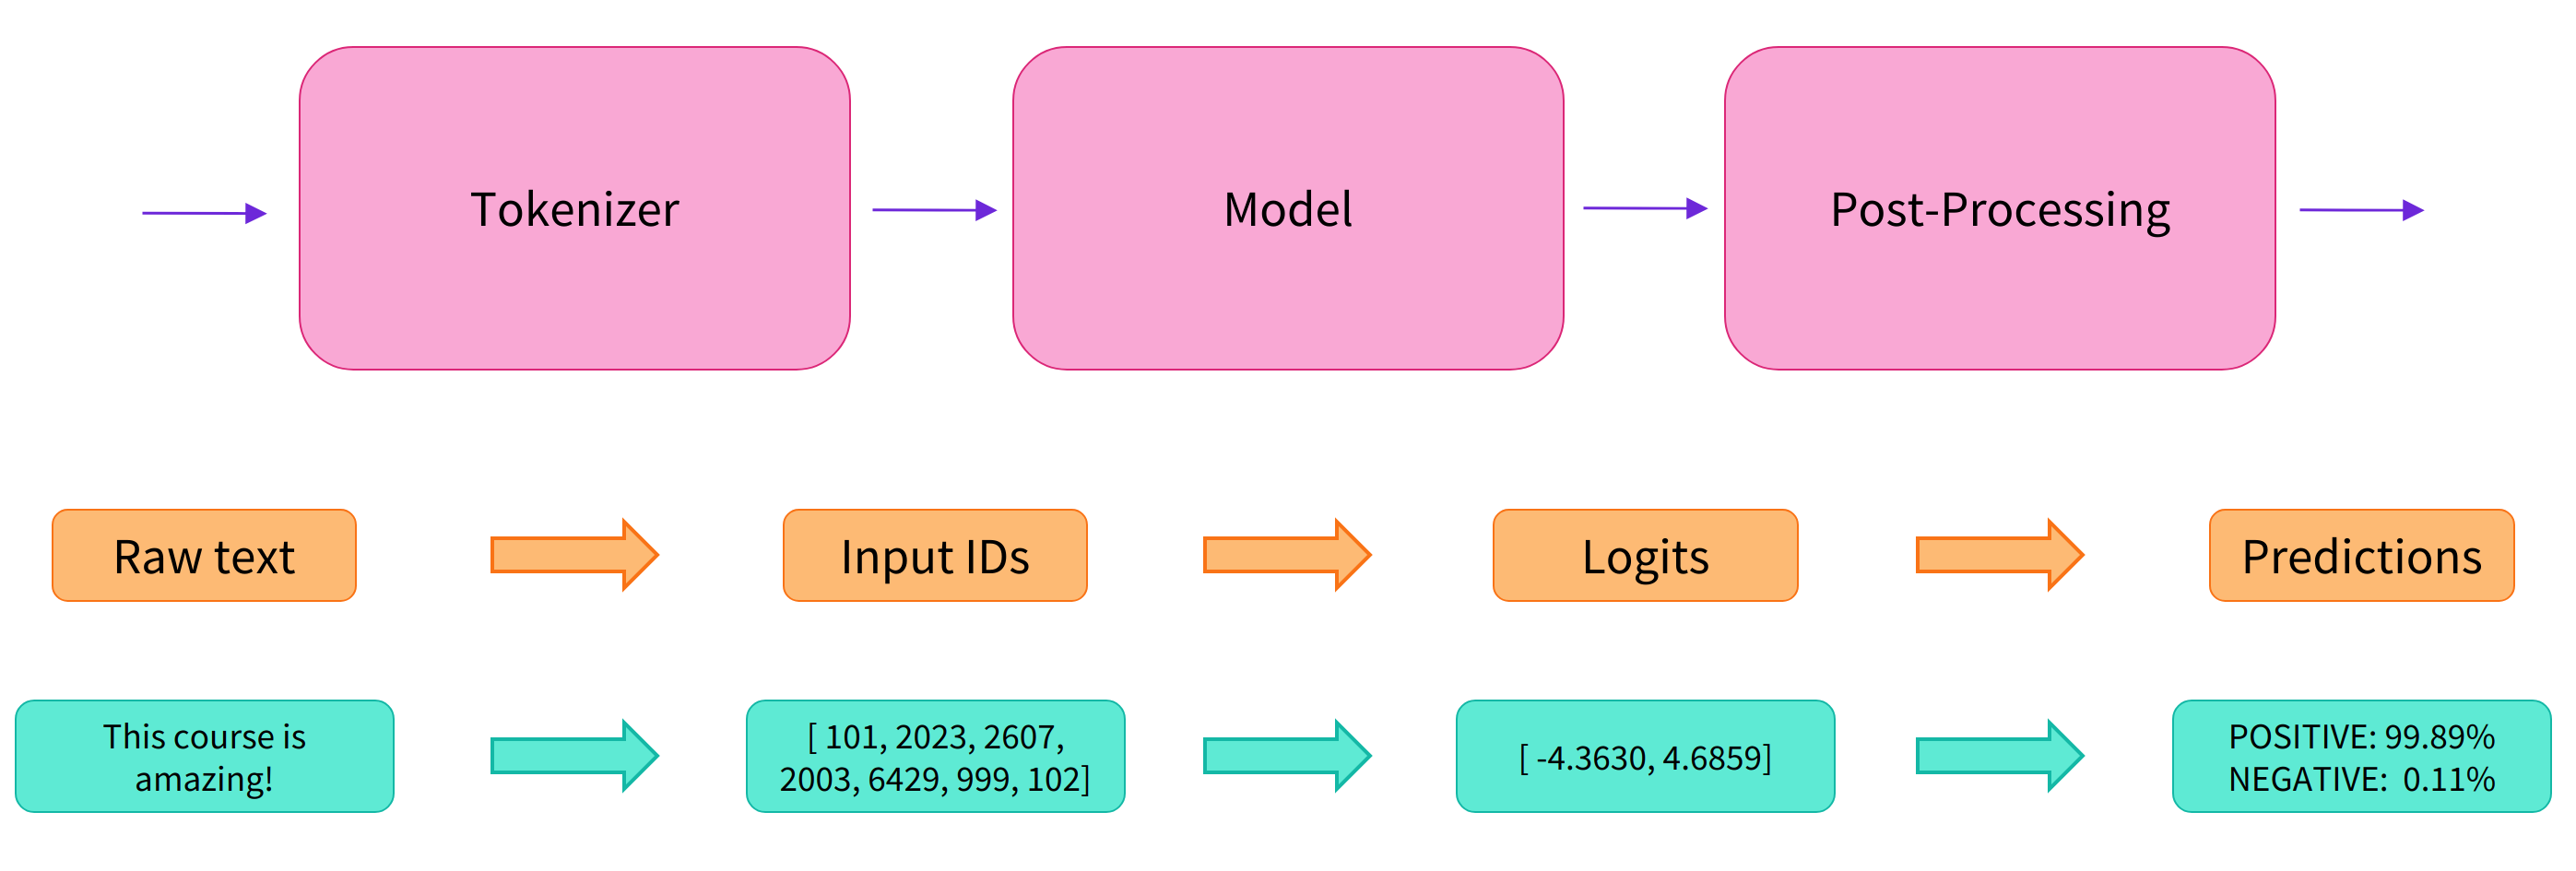

BERT based models have a specific tokenization.
When choosing a certain BERT model, choose the corresponding tokenizer as well

#### Tokenizer

In [9]:
############ LOAD TOKENIZER ###################

from transformers import AutoTokenizer

# load tokenizer
# Explanation of this model is here: https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english
model_name = "distilbert-base-uncased-finetuned-sst-2-english" # here you can load any tokenizer from huggingface
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [10]:
# Check tokenizer

In [ ]:
tokens = tokenizer.tokenize("The Transformer architecture is wonderful!")
tokens

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

In [ ]:
decoded = tokenizer.decode(ids)
decoded

In [ ]:
print(tokenizer.special_tokens_map)

In [ ]:
print(tokenizer.pretrained_init_configuration)

In [ ]:
# Check potential other Tokenizer functions

#dir(tokenizer)

In [12]:
# Usually you call the tokenizer on several sentences
# Transformer expects several sentences input

sample_seq = ["Hello!", "Nice day hola", "oranges are better than apples"]
sample_seq_tok = tokenizer(sample_seq, padding=True, truncation=True, return_tensors="pt")
sample_seq_tok

In [ ]:
# Study the output

tokenizer.convert_ids_to_tokens(sample_seq_tok["input_ids"][0])

In [ ]:
# Test the output for two sample sentences (that you provide)
# Choose sentences of different length and study the output

raw_inputs = [ "--sentence 1--", "--sentence 2---"]


# Padding: extends sentences to match same length. Tensors require a rectangular shape
# Truncation: transformer models have a limit of 512 or 1024 tokens. Truncation makes sure all sentences respect this
# attention mask: 1 indicate the corresponding tokens the model should attend to; 0 should be ignored
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

#### Load the model
The model corresponding to the tokenizer

In [ ]:
from transformers import AutoModel

# AutoModel: contains base Transformer module of given model_name
# for some input, outputs hidden states
model = AutoModel.from_pretrained(model_name)

In [13]:
# Study model
model # dir(model)

In [14]:
# Feed the input ids in the model
model(inputs["input_ids"])


In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape) # (batch size, sequence length, hidden size)

### Load model heads
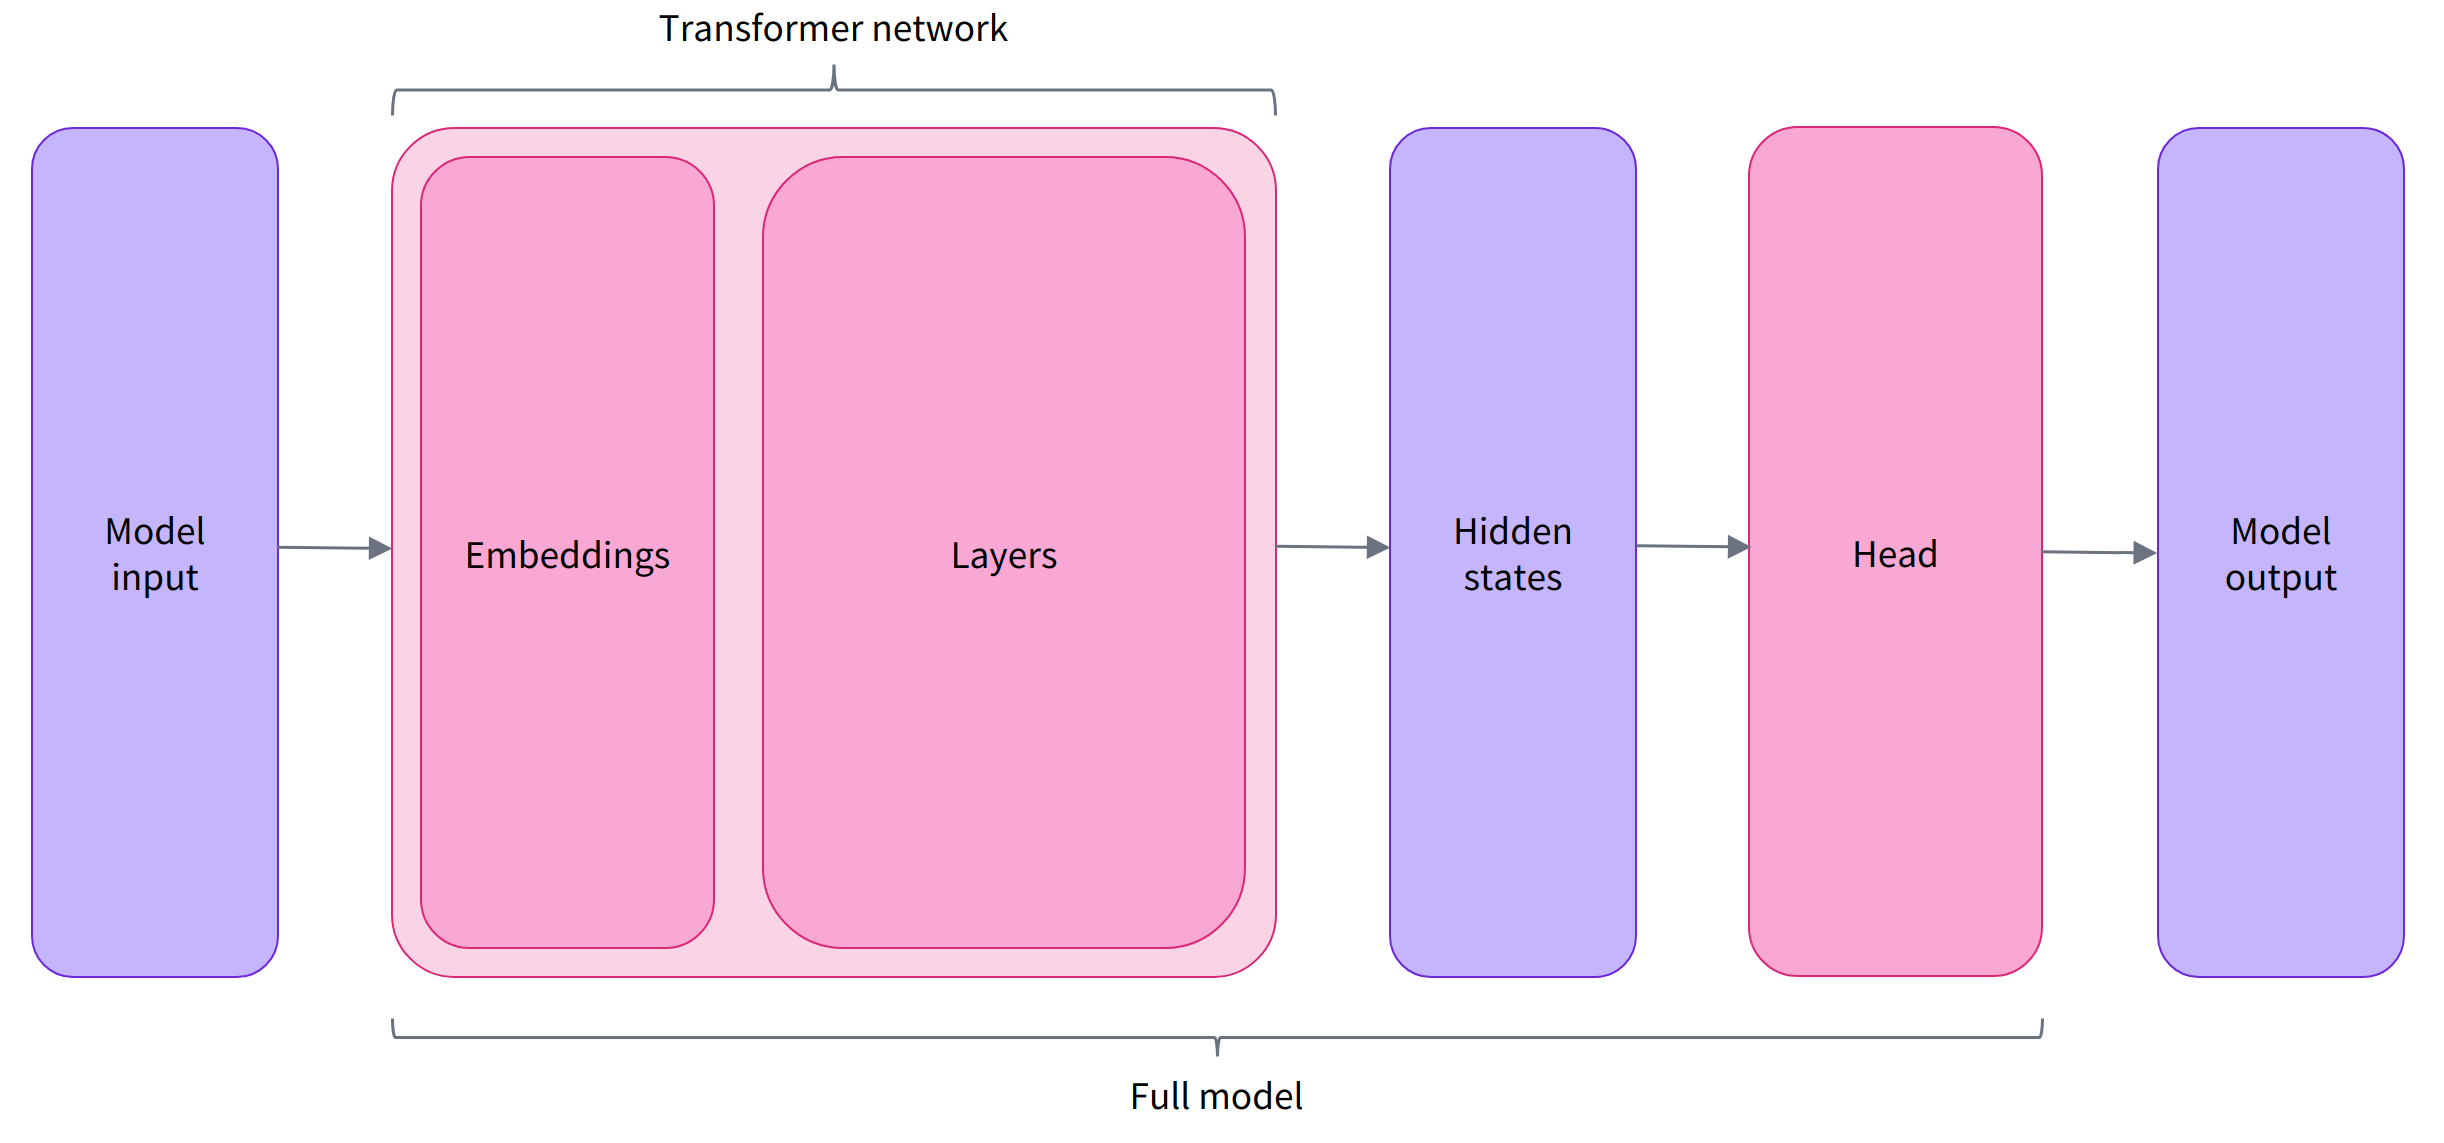

model outputs the hidden states. 
Different model heads can be built upon this model: 
- AutoModel (retrieven hidden states)
- AutoModelForQuestionAnswering
- AutoModelForSequenceClassification 
- AutoModelForTokenClassification
- etc.

In [ ]:
from transformers import AutoModelForSequenceClassification

# load sequence classification to be able to say if a sentence is positive or negative
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
outputs = model(**inputs)
outputs.logits.shape # we only have two sentences and two labels

### postprocessing the output

In [ ]:
outputs.logits

In [ ]:
# to convert logits to probabilities -> softmax
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)


In [ ]:
# to get the label for each position:
model.config.id2label

### Now choose different models from the Huggingface platform and play with them

https://huggingface.co/models

In [ ]:
TODO: Study output of bert models

## Optional: Checkout datasets

Various datasets are provided on the Huggingface Hub and easily accessible.

https://huggingface.co/datasets

with corresponding course:
https://huggingface.co/course/chapter5/1?fw=pt
